In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
df = pd.read_pickle('email_campaigns.pkl')

In [69]:
print(type(df))

<class 'list'>


In [70]:
df = pd.DataFrame(df)

In [71]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [72]:
df.shape

(52, 17)

In [73]:
df.head(3)

,example1,marketingAnalytics0,HRConsultingSeries,marketingAnalyticsSeries,MarketingAnalyticsSeries,series_legal,IT_Solutions_Series,Marketing_Analytics_Series,series_marketing_analytics,series1,HR_Consulting_Series,financial_advisory_series,series_IT_Solutions,Series1_HR_Consulting,Series_IT_Solutions,email_series_marketing_analytics,legal_services0
0,[{'subject': '🚀 Propel Your Marketing ROI with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[{'subject': '🚀 Boost Your Brand's Visibility ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[{'subject': '🚀Boost Your ROI with Precision M...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df.columns

Index(['example1', 'marketingAnalytics0', 'HRConsultingSeries',
       'marketingAnalyticsSeries', 'MarketingAnalyticsSeries', 'series_legal',
       'IT_Solutions_Series', 'Marketing_Analytics_Series',
       'series_marketing_analytics', 'series1', 'HR_Consulting_Series',
       'financial_advisory_series', 'series_IT_Solutions',
       'Series1_HR_Consulting', 'Series_IT_Solutions',
       'email_series_marketing_analytics', 'legal_services0'],
      dtype='object')

### Data Preprocessing

#### Combining multiple column into single columns 

In [75]:
import pandas as pd

# Custom function to handle concatenation
def concatenate_columns(row):
    result = []
    for col in ['example1','marketingAnalyticsSeries', 'MarketingAnalyticsSeries', 'Marketing_Analytics_Series', 'series_marketing_analytics','series1','email_series_marketing_analytics','marketingAnalytics0','financial_advisory_series','HRConsultingSeries', 'HR_Consulting_Series', 'Series1_HR_Consulting','IT_Solutions_Series', 'series_IT_Solutions', 'Series_IT_Solutions','series_legal', 'legal_services0']:
        result.extend(pd.Series(row[col]).dropna().tolist())
    return result

# Apply the custom function to create the new column
df['email_campaigns'] = df.apply(concatenate_columns, axis=1)

# Drop the old columns
df.drop(['example1','marketingAnalyticsSeries', 'MarketingAnalyticsSeries', 'Marketing_Analytics_Series','series_marketing_analytics','series1','email_series_marketing_analytics','marketingAnalytics0','financial_advisory_series','HRConsultingSeries', 'HR_Consulting_Series', 'Series1_HR_Consulting','IT_Solutions_Series', 'series_IT_Solutions', 'Series_IT_Solutions','series_legal', 'legal_services0'], axis=1, inplace=True)


In [76]:
df.shape

(52, 1)

In [77]:
df = pd.DataFrame(df)

In [78]:
df.describe()

,email_campaigns
count,52
unique,52
top,[{'subject': '🚀 Propel Your Marketing ROI with...
freq,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   email_campaigns  52 non-null     object
dtypes: object(1)
memory usage: 544.0+ bytes


In [80]:
df.isnull().sum()

email_campaigns    0
dtype: int64

In [81]:
### extratcing the insights for opened, meeting_clicked and responded before applying the preprocessing techniques

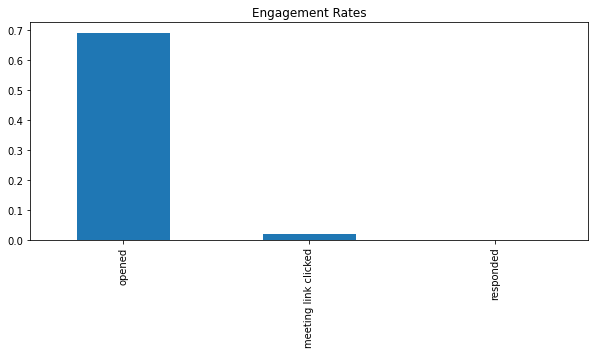

In [82]:
# Extracting information from the dictionaries within the lists
opened = [campaign[0].get('opened', False) if campaign else False for campaign in df['email_campaigns']]
meeting_clicked = [campaign[0].get('meeting link clicked', False) if campaign else False for campaign in df['email_campaigns']]
responded = [campaign[0].get('responded', False) if campaign else False for campaign in df['email_campaigns']]

# Creating a new DataFrame with the extracted information
engagement_df = pd.DataFrame({'opened': opened, 'meeting link clicked': meeting_clicked, 'responded': responded})

# Calculating engagement rates
engagement_rates = engagement_df.mean()

# Plotting the engagement rates
engagement_rates.plot(kind='bar', title='Engagement Rates',figsize=(10, 4))
plt.show()

## Creating a Separate column for Opened, Meeting link clicked, responded

In [83]:
# Create separate columns for 'opened', 'meeting link clicked', and 'responded'
df['opened'] = df['email_campaigns'].apply(lambda x: x[0].get('opened', False) if isinstance(x, list) and len(x) > 0 else False)
df['meeting link clicked'] = df['email_campaigns'].apply(lambda x: x[0].get('meeting link clicked', False) if isinstance(x, list) and len(x) > 0 else False)
df['responded'] = df['email_campaigns'].apply(lambda x: x[0].get('responded', False) if isinstance(x, list) and len(x) > 0 else False)

In [84]:
df.head()

,email_campaigns,opened,meeting link clicked,responded
0,[{'subject': '🚀 Propel Your Marketing ROI with...,False,False,False
1,[{'subject': '🚀 Boost Your Brand's Visibility ...,False,False,False
2,[{'subject': '🚀Boost Your ROI with Precision M...,False,False,False
3,[{'subject': '💡 Elevate Your Marketing with Ac...,True,False,False
4,[{'subject': '🚀 Propel Your Marketing with Dat...,True,False,False


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   email_campaigns       52 non-null     object
 1   opened                52 non-null     object
 2   meeting link clicked  52 non-null     object
 3   responded             52 non-null     object
dtypes: object(4)
memory usage: 1.8+ KB


In [86]:
import re

In [87]:

# Define preprocessing functions
def preprocess_text(text):
    if pd.isna(text):
        return ''
    # Lowercasing
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization (optional)
    tokens = word_tokenize(text)
    # Remove stopwords (optional)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization (optional)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back to text
    processed_text = ' '.join(tokens)
    return processed_text

# Convert the 'email_campaigns' column to a single string
df['email_campaigns'] = df['email_campaigns'].apply(lambda x: ' '.join([preprocess_text(item['subject'] + ' ' + item['body']) if isinstance(item, dict) else preprocess_text(item) for item in x]))


In [88]:
df = df.astype(str)

In [89]:
df.head()

,email_campaigns,opened,meeting link clicked,responded
0,propel marketing roi advanced analytics hey re...,False,False,False
1,boost brand visibility proven marketing analyt...,False,False,False
2,boost roi precision marketing analytics hi rec...,False,False,False
3,elevate marketing actionable insight hi recipi...,True,False,False
4,propel marketing datadriven insight hello reci...,True,False,False


In [90]:
# Assuming your DataFrame is named df
df = df.drop(27, axis=0)

# Reset the index after dropping the row
df = df.reset_index(drop=True)

In [91]:
### COnverting the categorical variable into numerical varibale for columns opened, metting link clicked and responded

In [92]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
df['opened'] = label_encoder.fit_transform(df['opened'])
df['meeting link clicked'] = label_encoder.fit_transform(df['meeting link clicked'])
df['responded'] = label_encoder.fit_transform(df['responded'])

## EDA

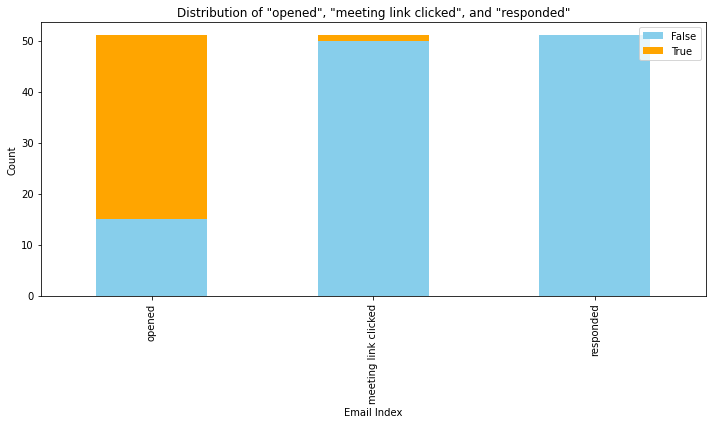

In [93]:

# Convert columns to boolean type
df['opened'] = df['opened'].astype(bool)
df['meeting link clicked'] = df['meeting link clicked'].astype(bool)
df['responded'] = df['responded'].astype(bool)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

df[['opened', 'meeting link clicked', 'responded']].apply(pd.Series.value_counts).T.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'orange'])
ax.set_title('Distribution of "opened", "meeting link clicked", and "responded"')
ax.set_xlabel('Email Index')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


In [94]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


### Word Cloud

#### The word cloud shoes the word used in the email where the majority is realted on 'Marketing','meeting',escipient', etc,

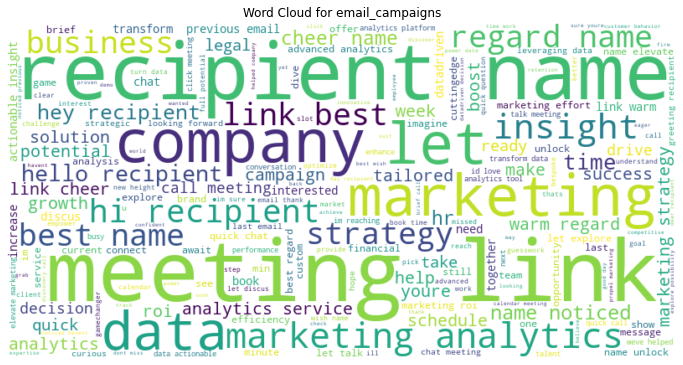

In [95]:
from wordcloud import WordCloud

text_data = ' '.join(df['email_campaigns'].astype(str))

# Create a WordCloud object
wordhighlcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot the WordCloud image
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for email_campaigns')
plt.show()


### Most Word Frequency

#### It shows the top 20 words is heighly appired in the email's 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kishu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


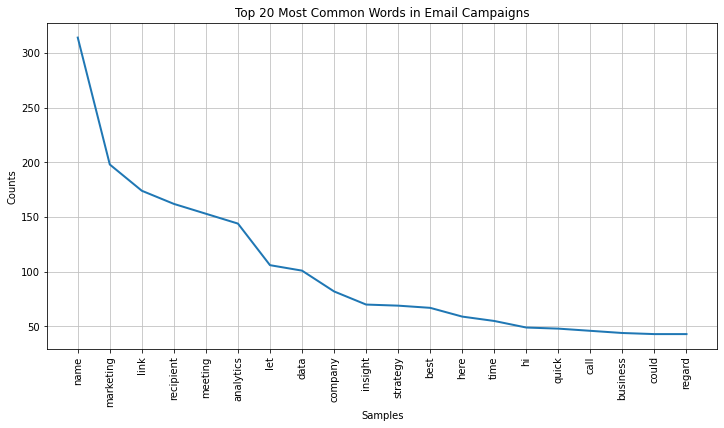

In [96]:
from nltk.probability import FreqDist
import nltk

# Download NLTK resources
nltk.download('punkt')

# Assuming your DataFrame is named df
text_data = ' '.join(df['email_campaigns'].astype(str))  # Combine all text data into a single string

# Tokenize the text
tokens = word_tokenize(text_data)

# Lowercase and remove non-alphabetic tokens
tokens = [word.lower() for word in tokens if word.isalpha()]

# Calculate word frequencies
freq_dist = FreqDist(tokens)

# Plot the top N words
top_n_words = 20  # You can adjust this number
plt.figure(figsize=(12, 6))
plt.title(f'Top {top_n_words} Most Common Words in Email Campaigns')
plt.xlabel('Word')
plt.ylabel('Frequency')
freq_dist.plot(top_n_words, cumulative=False)
plt.show()


### Sentiment Analysis

#### All the text data is in the positive sentences hence the all the text is postive  

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kishu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


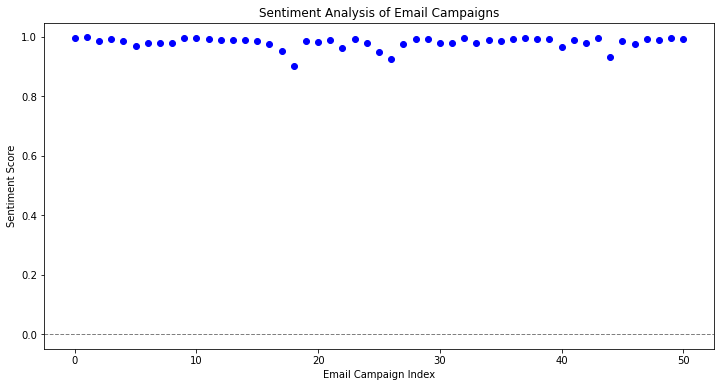

In [97]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming your DataFrame is named df
# Assuming your text data is in a column named 'email_campaigns', replace it with your actual column name

# Download the VADER lexicon
import nltk
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis and create a new column 'sentiment'
df['sentiment'] = df['email_campaigns'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Plotting the sentiment scores
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['sentiment'], color='blue', marker='o')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Adding a horizontal line at sentiment score 0
plt.title('Sentiment Analysis of Email Campaigns')
plt.xlabel('Email Campaign Index')
plt.ylabel('Sentiment Score')
plt.show()


## Model Training

In [98]:

# Step 1: Split the Data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Step 2: Vectorize the Text Data
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = vectorizer.fit_transform(train_df['email_campaigns'])
X_test = vectorizer.transform(test_df['email_campaigns'])

# Step 3: Train a Classification Model
model = MultinomialNB()  # You can use other models like Logistic Regression or SVM
model.fit(X_train, train_df['opened'])

# Step 4: Evaluate the Model
predictions = model.predict(X_test)
accuracy = accuracy_score(test_df['opened'], predictions)

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(test_df['opened'], predictions))


Accuracy: 0.73
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         3
        True       0.73      1.00      0.84         8

    accuracy                           0.73        11
   macro avg       0.36      0.50      0.42        11
weighted avg       0.53      0.73      0.61        11



C:\Users\kishu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kishu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kishu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Accuracy (Overall Performance):

Overall accuracy is 73%, meaning the model's predictions are correct 73% of the time.
Precision, Recall, F1-Score (Performance Metrics for each Class):

### True Class (Opened):

Precision (Accuracy of positive predictions): 73%
Recall (Ability to capture all positive instances): 100%
F1-Score (Balance between precision and recall): 84%
Support (Number of actual occurrences): 8 instances
False Class (Not Opened):

Precision: 0% (indicates no correct positive predictions for this class)
Recall: 0% (indicates the model misses all actual instances of this class)
F1-Score: 0%
Support: 3 instances
Analysis and Recommendations:

While the model performs well in predicting opened emails, it struggles with emails that are not opened.
Consider analyzing misclassifications to identify patterns or issues.
Experiment with different models, hyperparameters, or feature engineering to improve performance.
Address class imbalances in the data, if present.